In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
def plot_loss(loss_array):
    plt.plot(range(len(loss_array)), loss_array)
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()

In [3]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [4]:
# 2d version of np.arange()
# Creates and array of shape (n,1)
# And convert it into float32
x_train = np.mgrid[1:101:1].reshape(1, -1).T
x_train = np.float32(x_train)

In [5]:
# Get y = 2 * x + 1 as numpy array
y_train = np.array([2*i+1 for i in x_train], dtype=np.float32)

In [6]:
x_train.shape, y_train.shape

((100, 1), (100, 1))

In [7]:
# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.0001

In [8]:
model = LinearRegression(input_size, output_size)

In [9]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

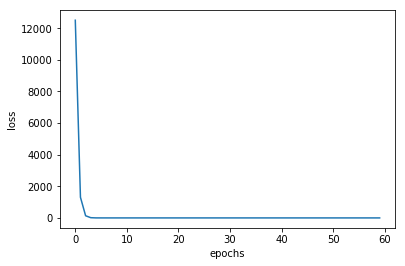

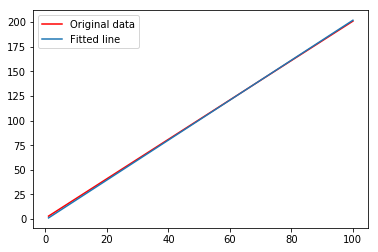

In [10]:
loss_array = list()

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train), requires_grad=False)
    targets = Variable(torch.from_numpy(y_train), requires_grad=False)

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()        
    loss_array.append(loss.data[0])

plot_loss(loss_array)

# Plot the graph
predicted = model(Variable(torch.from_numpy(x_train)), requires_grad=False).data.numpy()
plt.plot(x_train, y_train, 'r', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [11]:
x = np.float32(np.mgrid[1:10:1, 1:10:1].reshape(2, -1).T)

In [12]:
y = np.float32([2*i[0] + 3*i[1] + 4 for i in x])[:,np.newaxis]

In [13]:
x.shape, y.shape

((81, 2), (81, 1))

In [14]:
# Hyper Parameters
input_size = 2
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [15]:
model = LinearRegression(input_size, output_size)

In [16]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [17]:
from mpl_toolkits.mplot3d import Axes3D

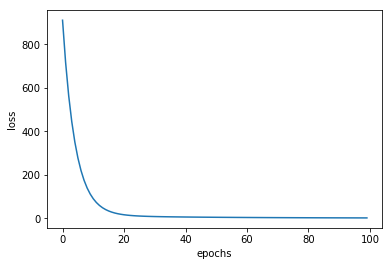

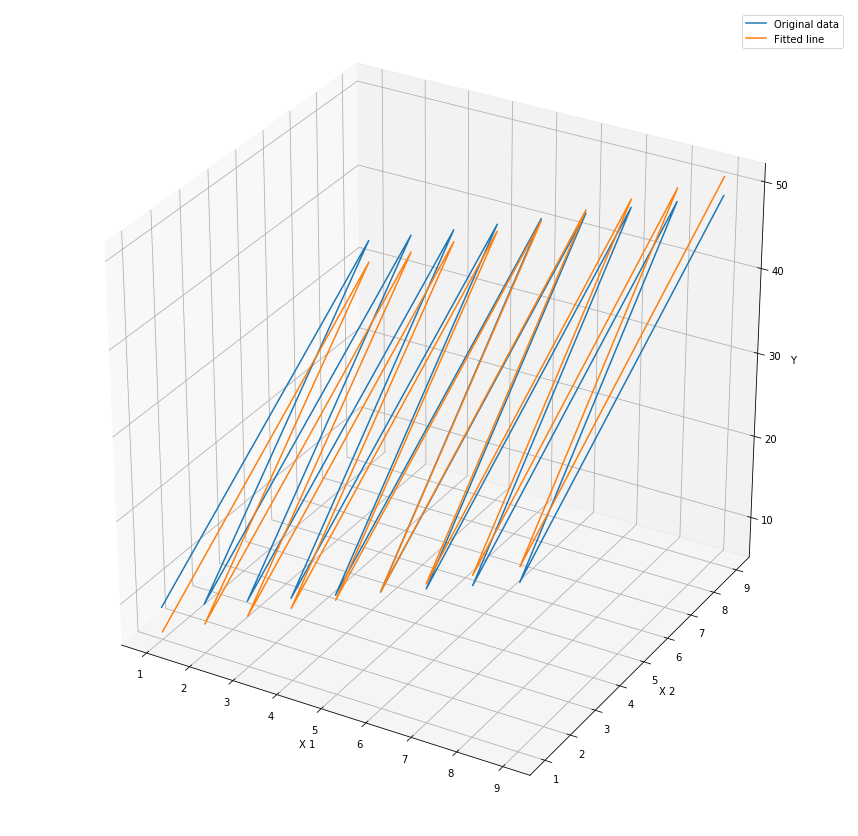

In [18]:
loss_array = list()

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x))
    targets = Variable(torch.from_numpy(y))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss.data[0])

plot_loss(loss_array)    

        
# Plot the graph
pred = model(Variable(torch.from_numpy(x))).data.numpy()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[:,0], x[:,1], zs=y[:,0], label='Original data')
ax.plot(x[:,0], x[:,1], zs=pred[:,0], label='Fitted line')

ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('Y')
plt.legend()

plt.show()

In [19]:
x_ = np.float32(np.mgrid[1:20:1, 1:20:1, 1:20:1, 1:20:1].reshape(4, -1).T)
y_ = np.float32([2*i[0] + 3*i[1] + 4*i[1] + 5*i[1] + 6 for i in x_])[:,np.newaxis]

In [20]:
x_.shape, y_.shape

((130321, 4), (130321, 1))

In [21]:
# Hyper Parameters
input_size = 4
output_size = 1
num_epochs = 1000
learning_rate = 0.0001

In [22]:
model = LinearRegression(input_size, output_size)

In [23]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

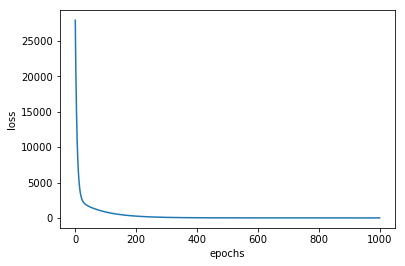

In [24]:
# Train the Model 
loss_array = list()
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_))
    targets = Variable(torch.from_numpy(y_))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss.data[0])

plot_loss(loss_array)

In [34]:
xx = np.float32(np.mgrid[1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1, 1:10:1].reshape(6, -1).T)

a = np.float32([2*i[0] + 3*i[1] + 4*i[1] + 6 for i in xx])[:,np.newaxis]
b = np.float32([7*i[2] + 9*i[3] + 5*i[4] + 4 for i in xx])[:,np.newaxis]
c = np.float32([4*i[4] + 1*i[5] + 9*i[0] + 1 for i in xx])[:,np.newaxis]
yy = np.hstack((a, b, c))

xx.shape, yy.shape

((531441, 6), (531441, 3))

In [42]:
# Hyper Parameters
input_size = 6
output_size = 3
num_epochs = 1000
learning_rate = 0.001

In [43]:
model = LinearRegression(input_size, output_size)

In [44]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

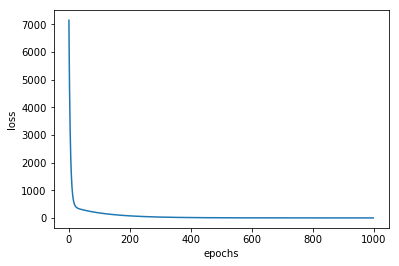

In [45]:
# Train the Model 
loss_array = list()
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(xx))
    targets = Variable(torch.from_numpy(yy))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss.data[0])

plot_loss(loss_array)

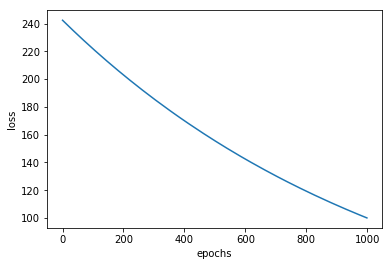

In [40]:
# # # # # lr = 0.0001

# # Train the Model 
# loss_array = list()
# for epoch in range(num_epochs):
#     # Convert numpy array to torch Variable
#     inputs = Variable(torch.from_numpy(xx))
#     targets = Variable(torch.from_numpy(yy))

#     # Forward + Backward + Optimize
#     optimizer.zero_grad()  
#     outputs = model(inputs)
#     loss = criterion(outputs, targets)
#     loss.backward()
#     optimizer.step()
    
#     loss_array.append(loss.data[0])

# plot_loss(loss_array)

In [53]:
losses = list()
for lr in [0.01, 0.001, 0.0001, 0.00001]:    
    # Hyper Parameters
    input_size = 6
    output_size = 3
    num_epochs = 1000
    learning_rate = 0.001

    model = LinearRegression(input_size, output_size)

    # Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

    # Train the Model 
    loss_array = list()
    for epoch in range(num_epochs):
        # Convert numpy array to torch Variable
        inputs = Variable(torch.from_numpy(xx))
        targets = Variable(torch.from_numpy(yy))

        # Forward + Backward + Optimize
        optimizer.zero_grad()  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        loss_array.append(loss.data[0])

    losses.append(loss_array)

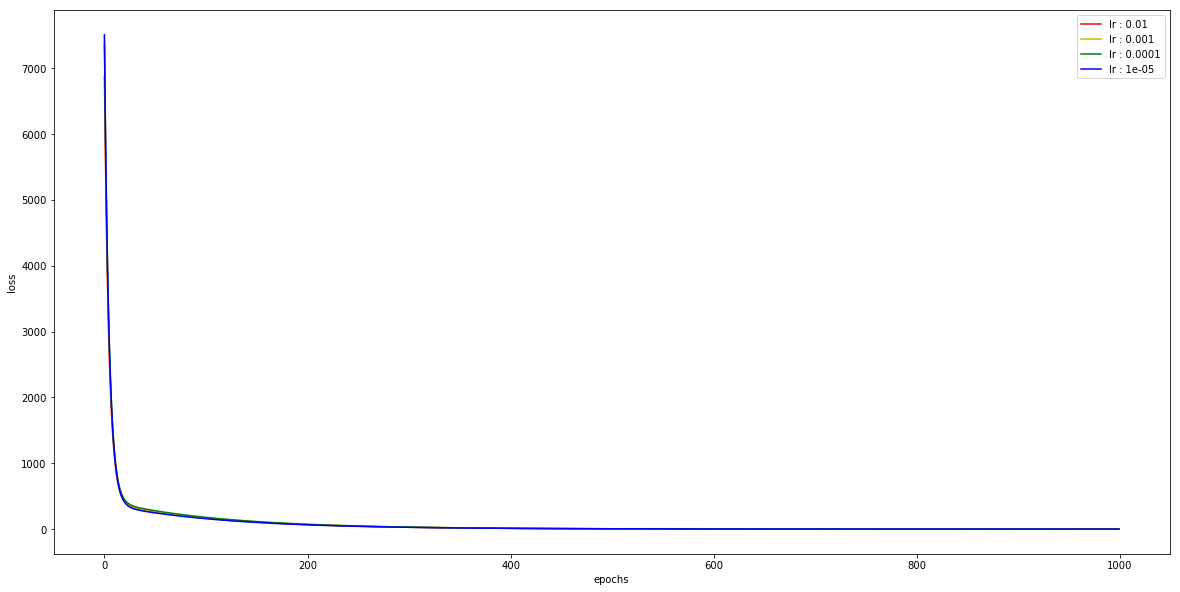

In [67]:
pattern = ['r-', 'y-', 'g-', 'b-']
lrs = [0.01, 0.001, 0.0001, 0.00001]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    loss = losses[i]
    lr = lrs[i]
#     plt.plot(range(len(loss)), loss, pattern[i], label='lr : ' + str(lr))
    ax.plot(range(len(loss)), loss, pattern[i], label='lr : ' + str(lr))


ax.set_ylabel('loss')
ax.set_xlabel('epochs')
plt.legend()
plt.show()